In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
cleaned_data=pd.read_csv('cleaned_data.csv')

In [4]:
cleaned_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_data['LIMIT_BAL'].values.reshape(-1,1), cleaned_data['default payment next month'].values,
test_size=0.2, random_state=24)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [7]:
print(np.mean(y_train))
print(np.mean(y_test))


0.223102526838873
0.21657603600225014


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [8]:
from sklearn.linear_model import LogisticRegression
lg_model=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

In [9]:
lg_model.fit(X_train, y_train)


LogisticRegression(C=0.1, multi_class='ovr', solver='liblinear')

In [10]:
y_pred=lg_model.predict(X_test)

In [11]:
lg_model.score(X_test, y_test)


0.7834239639977498

In [12]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

In [13]:
true_pred=y_pred==y_test
np.mean(true_pred)

0.7834239639977498

In [14]:
p = sum(y_test)
print('p',p)
tp = sum( (y_test==1) & (y_pred==1) )
print('tp',tp)
print('tpr',tp/p)

p 1155
tp 0
tpr 0.0


In [15]:
fn = sum( (y_test==1) & (y_pred==0) )
print('fn',fn)
print('fnr',fn/p)

fn 1155
fnr 1.0


In [16]:
n=sum(y_test==0)
tn = sum((y_test==0) & (y_pred==0))
fp = sum((y_test==0) & (y_pred==1))
tnr = tn/n
fpr = fp/n
print('tn {} ,fp {} ,tnr {},  fpr {}'.format(tn,fp,tnr, fpr))

tn 4178 ,fp 0 ,tnr 1.0,  fpr 0.0


In [17]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [18]:
y_pred_proba = lg_model.predict_proba(X_test)
y_pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [19]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [20]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
y_pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [22]:
prob_sum.shape

(5333,)

In [23]:
np.unique(prob_sum)

array([1.])

In [24]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606566])

Text(0, 0.5, 'Number of samples')

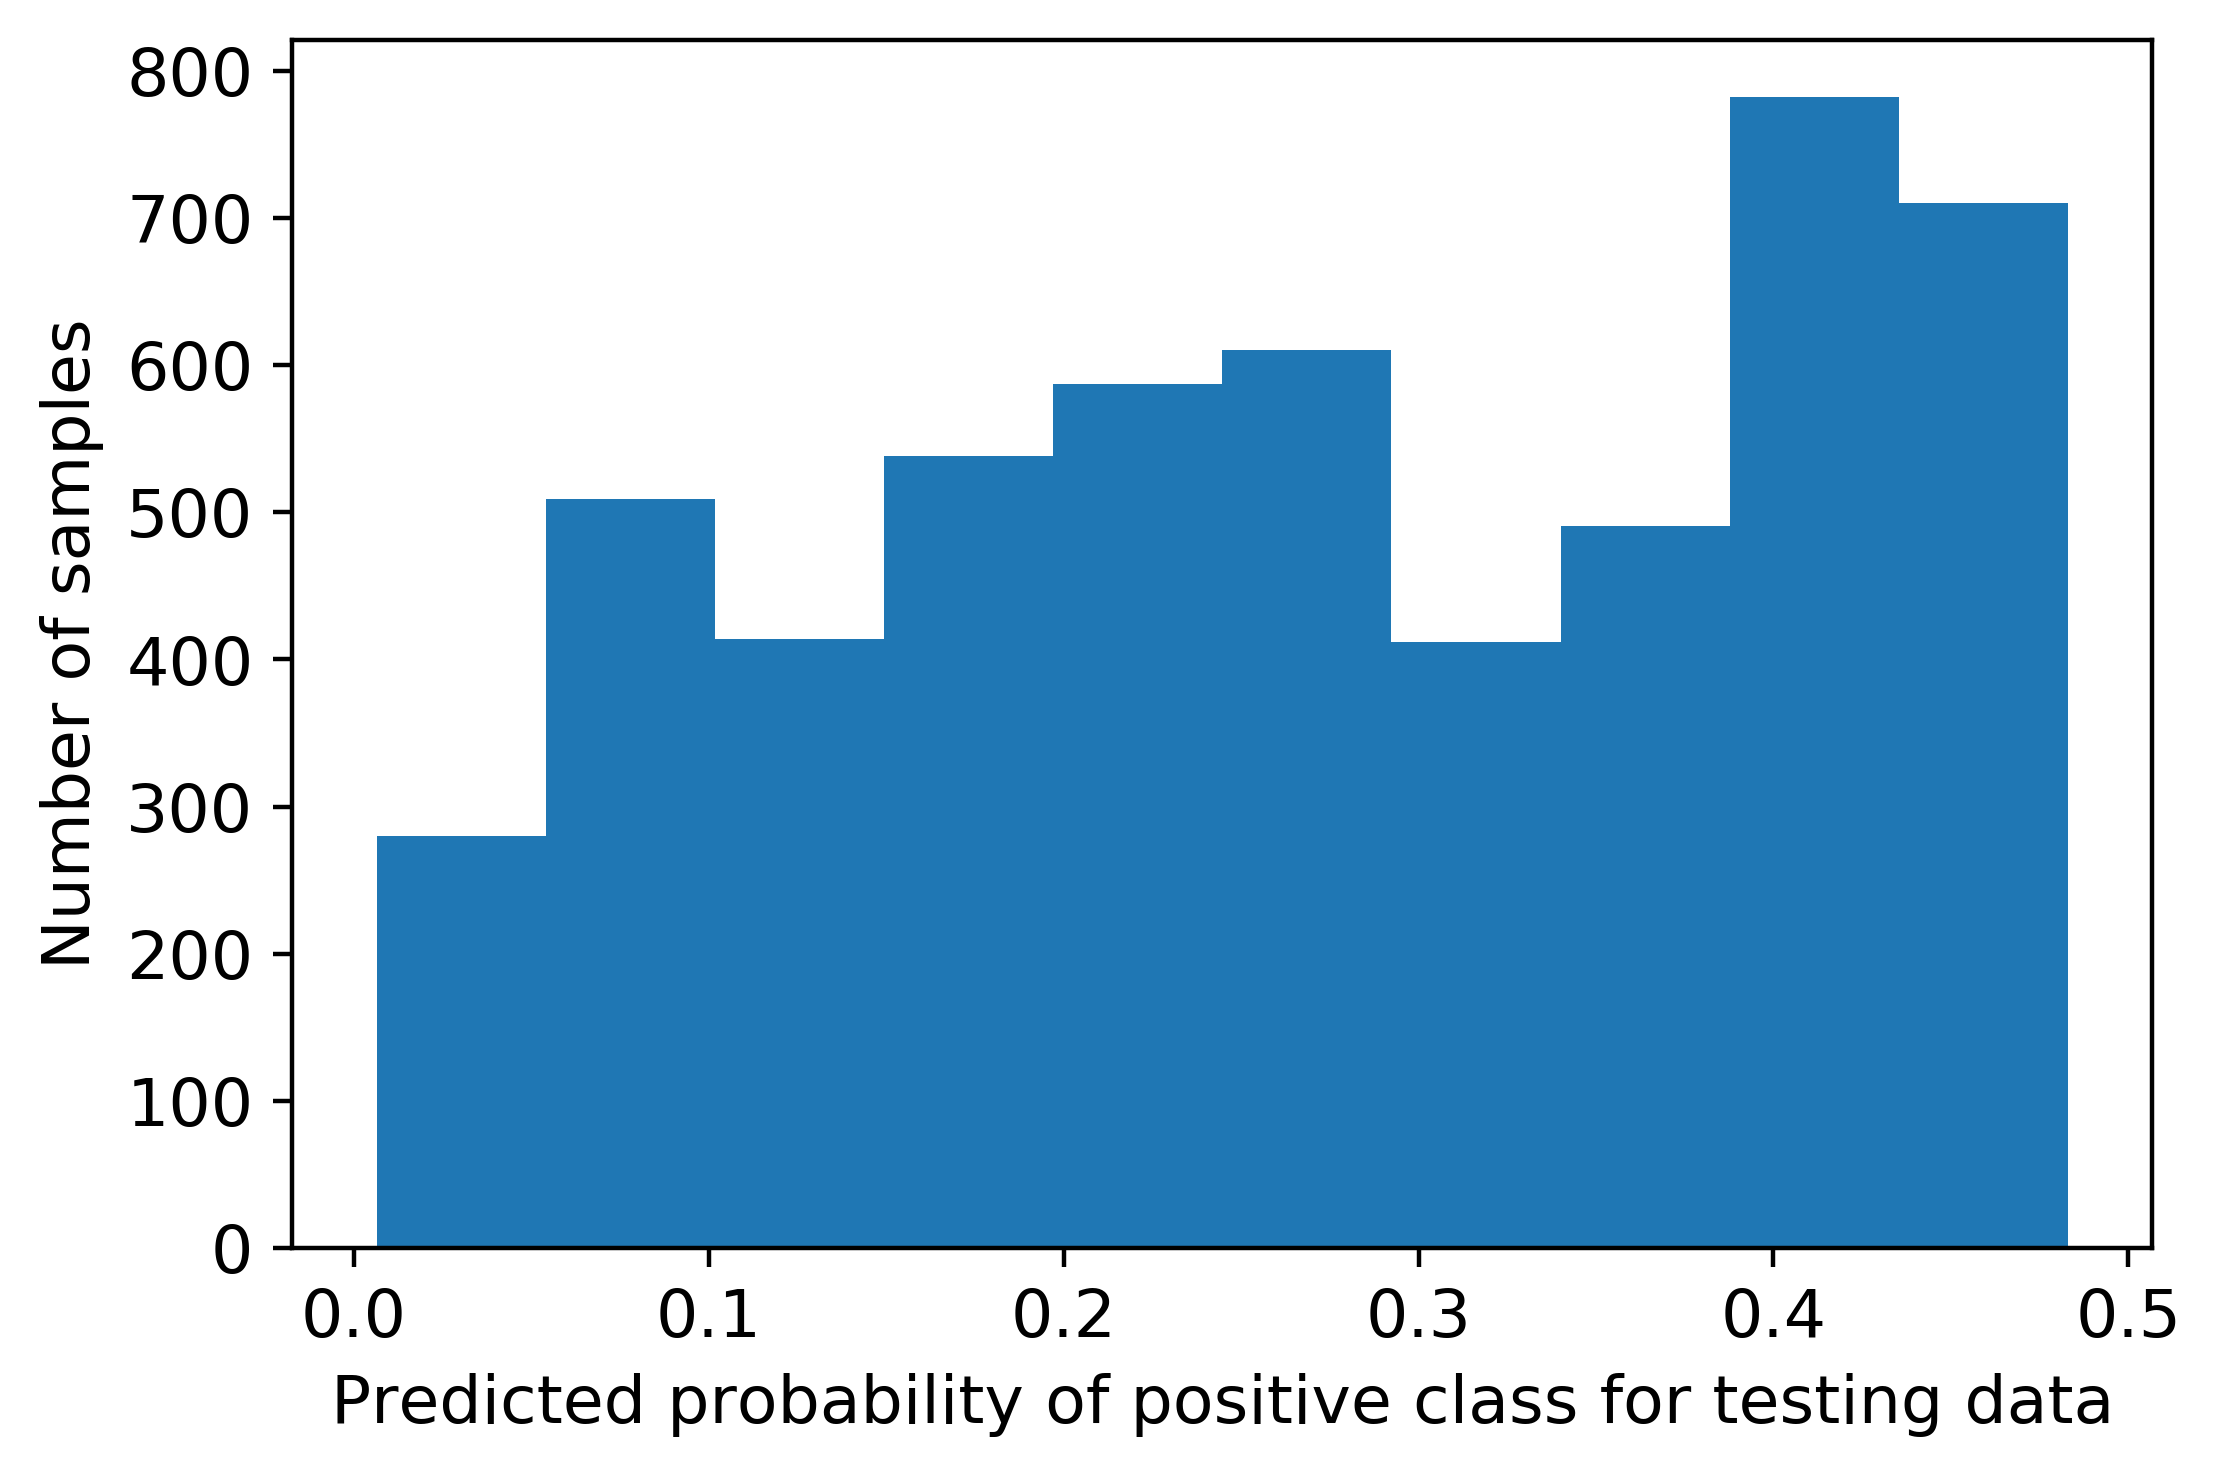

In [25]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [26]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

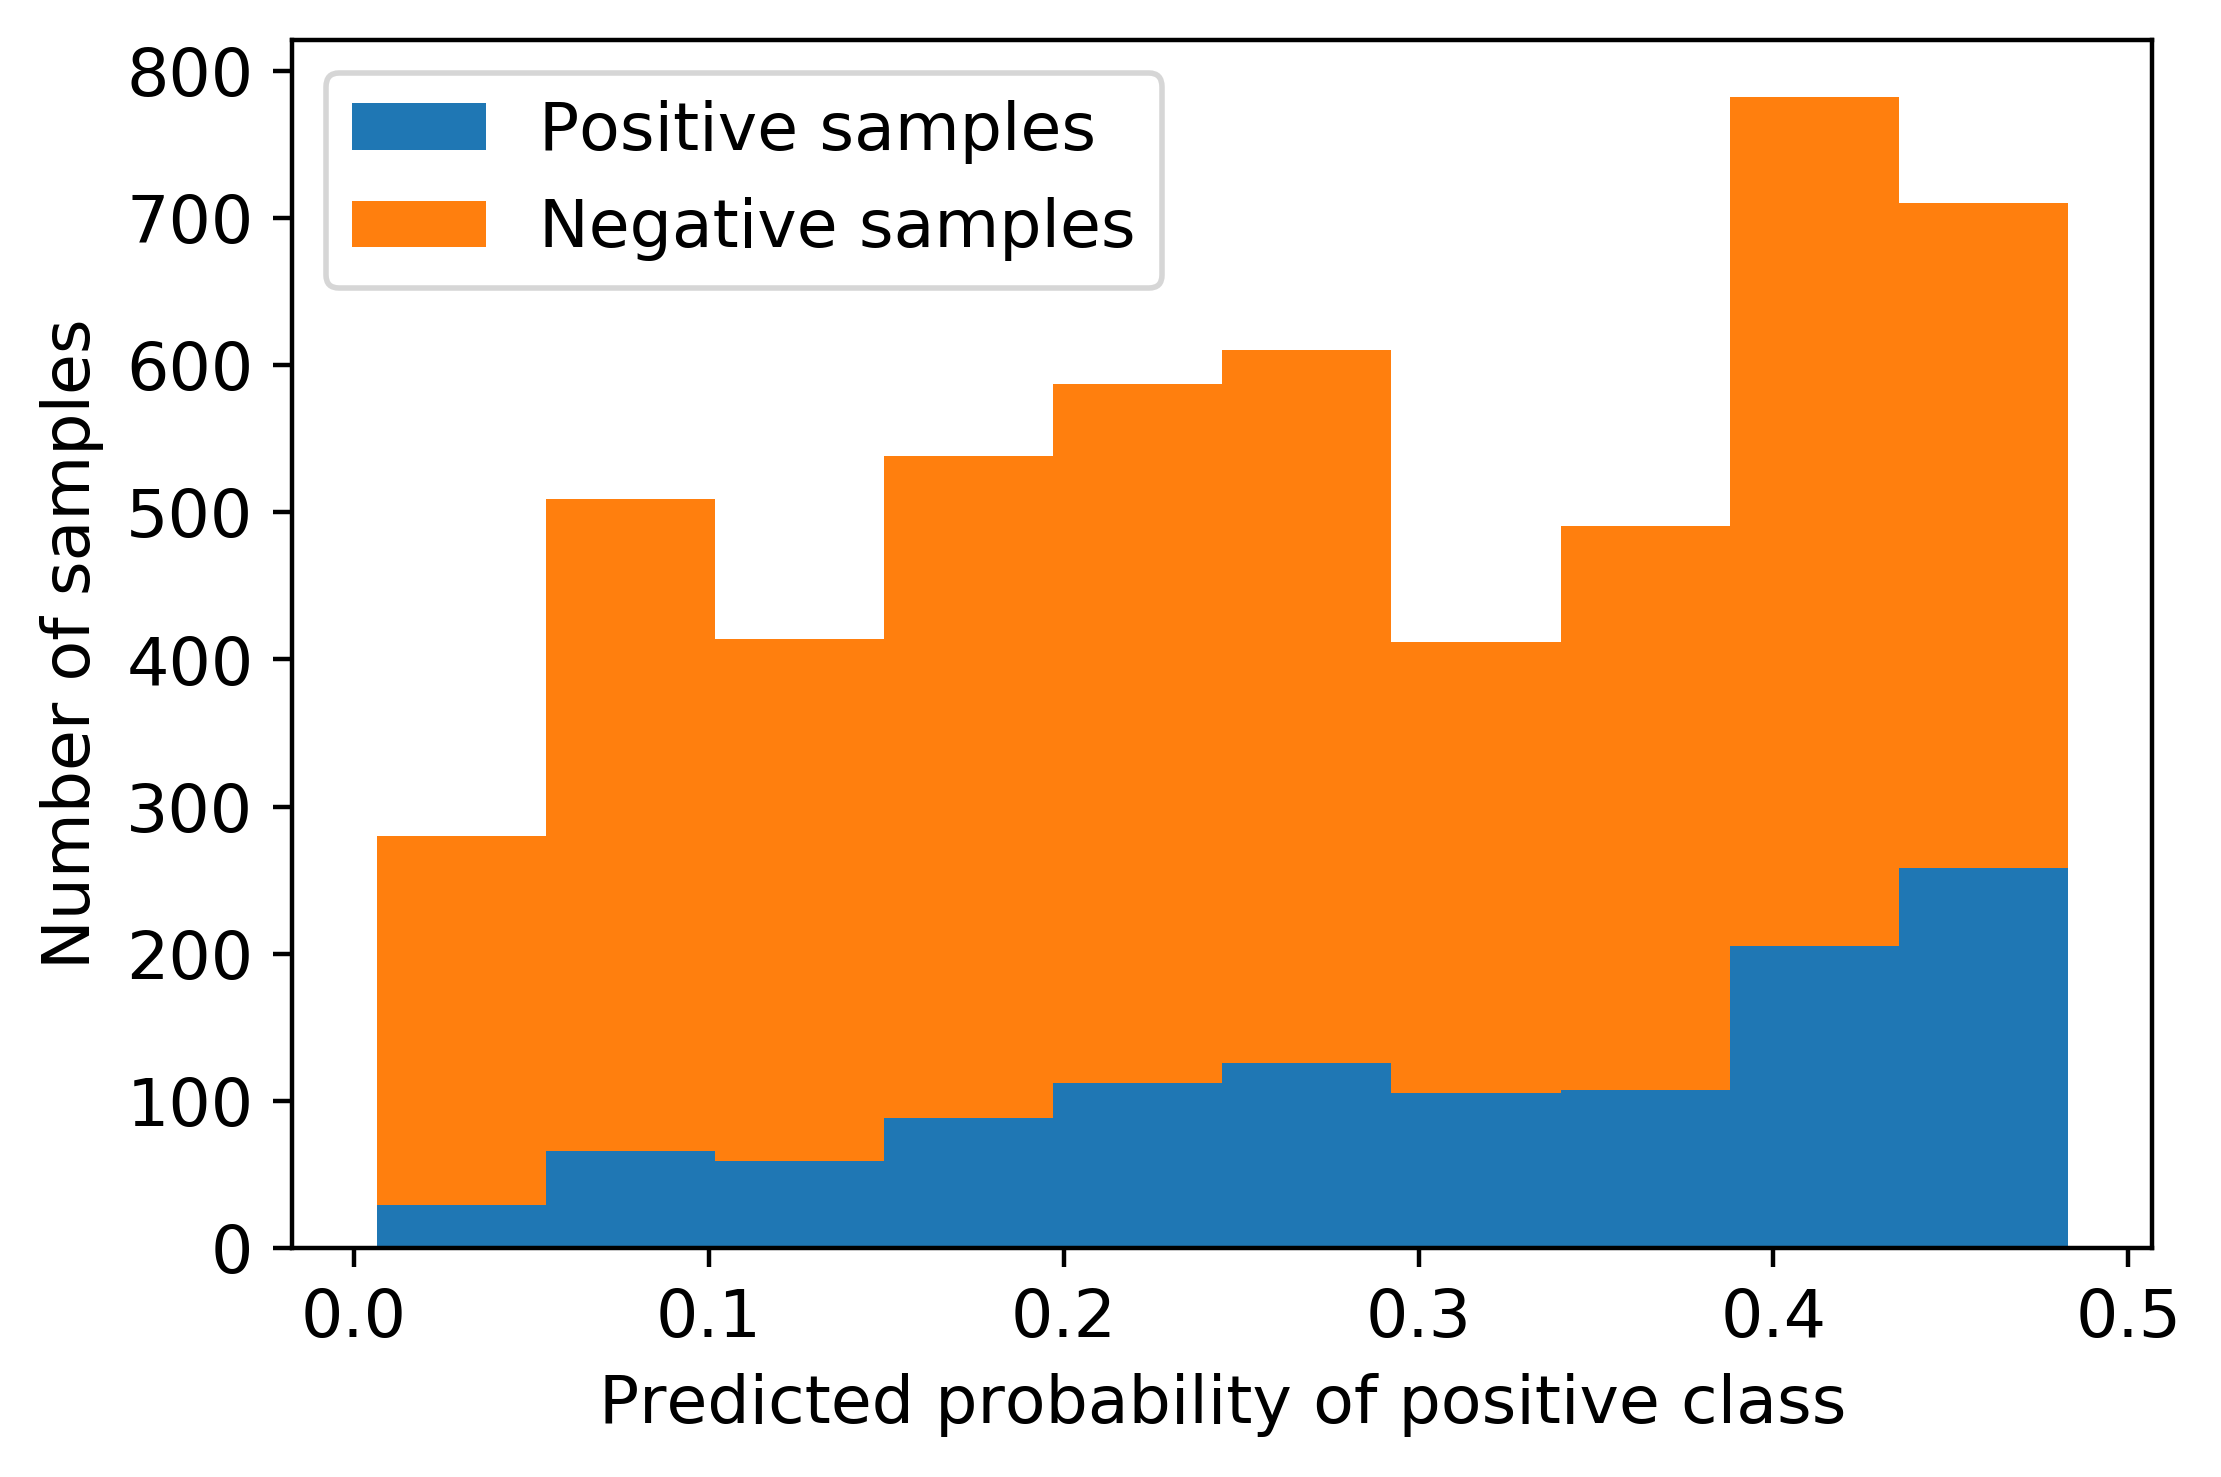

In [27]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')


_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [28]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

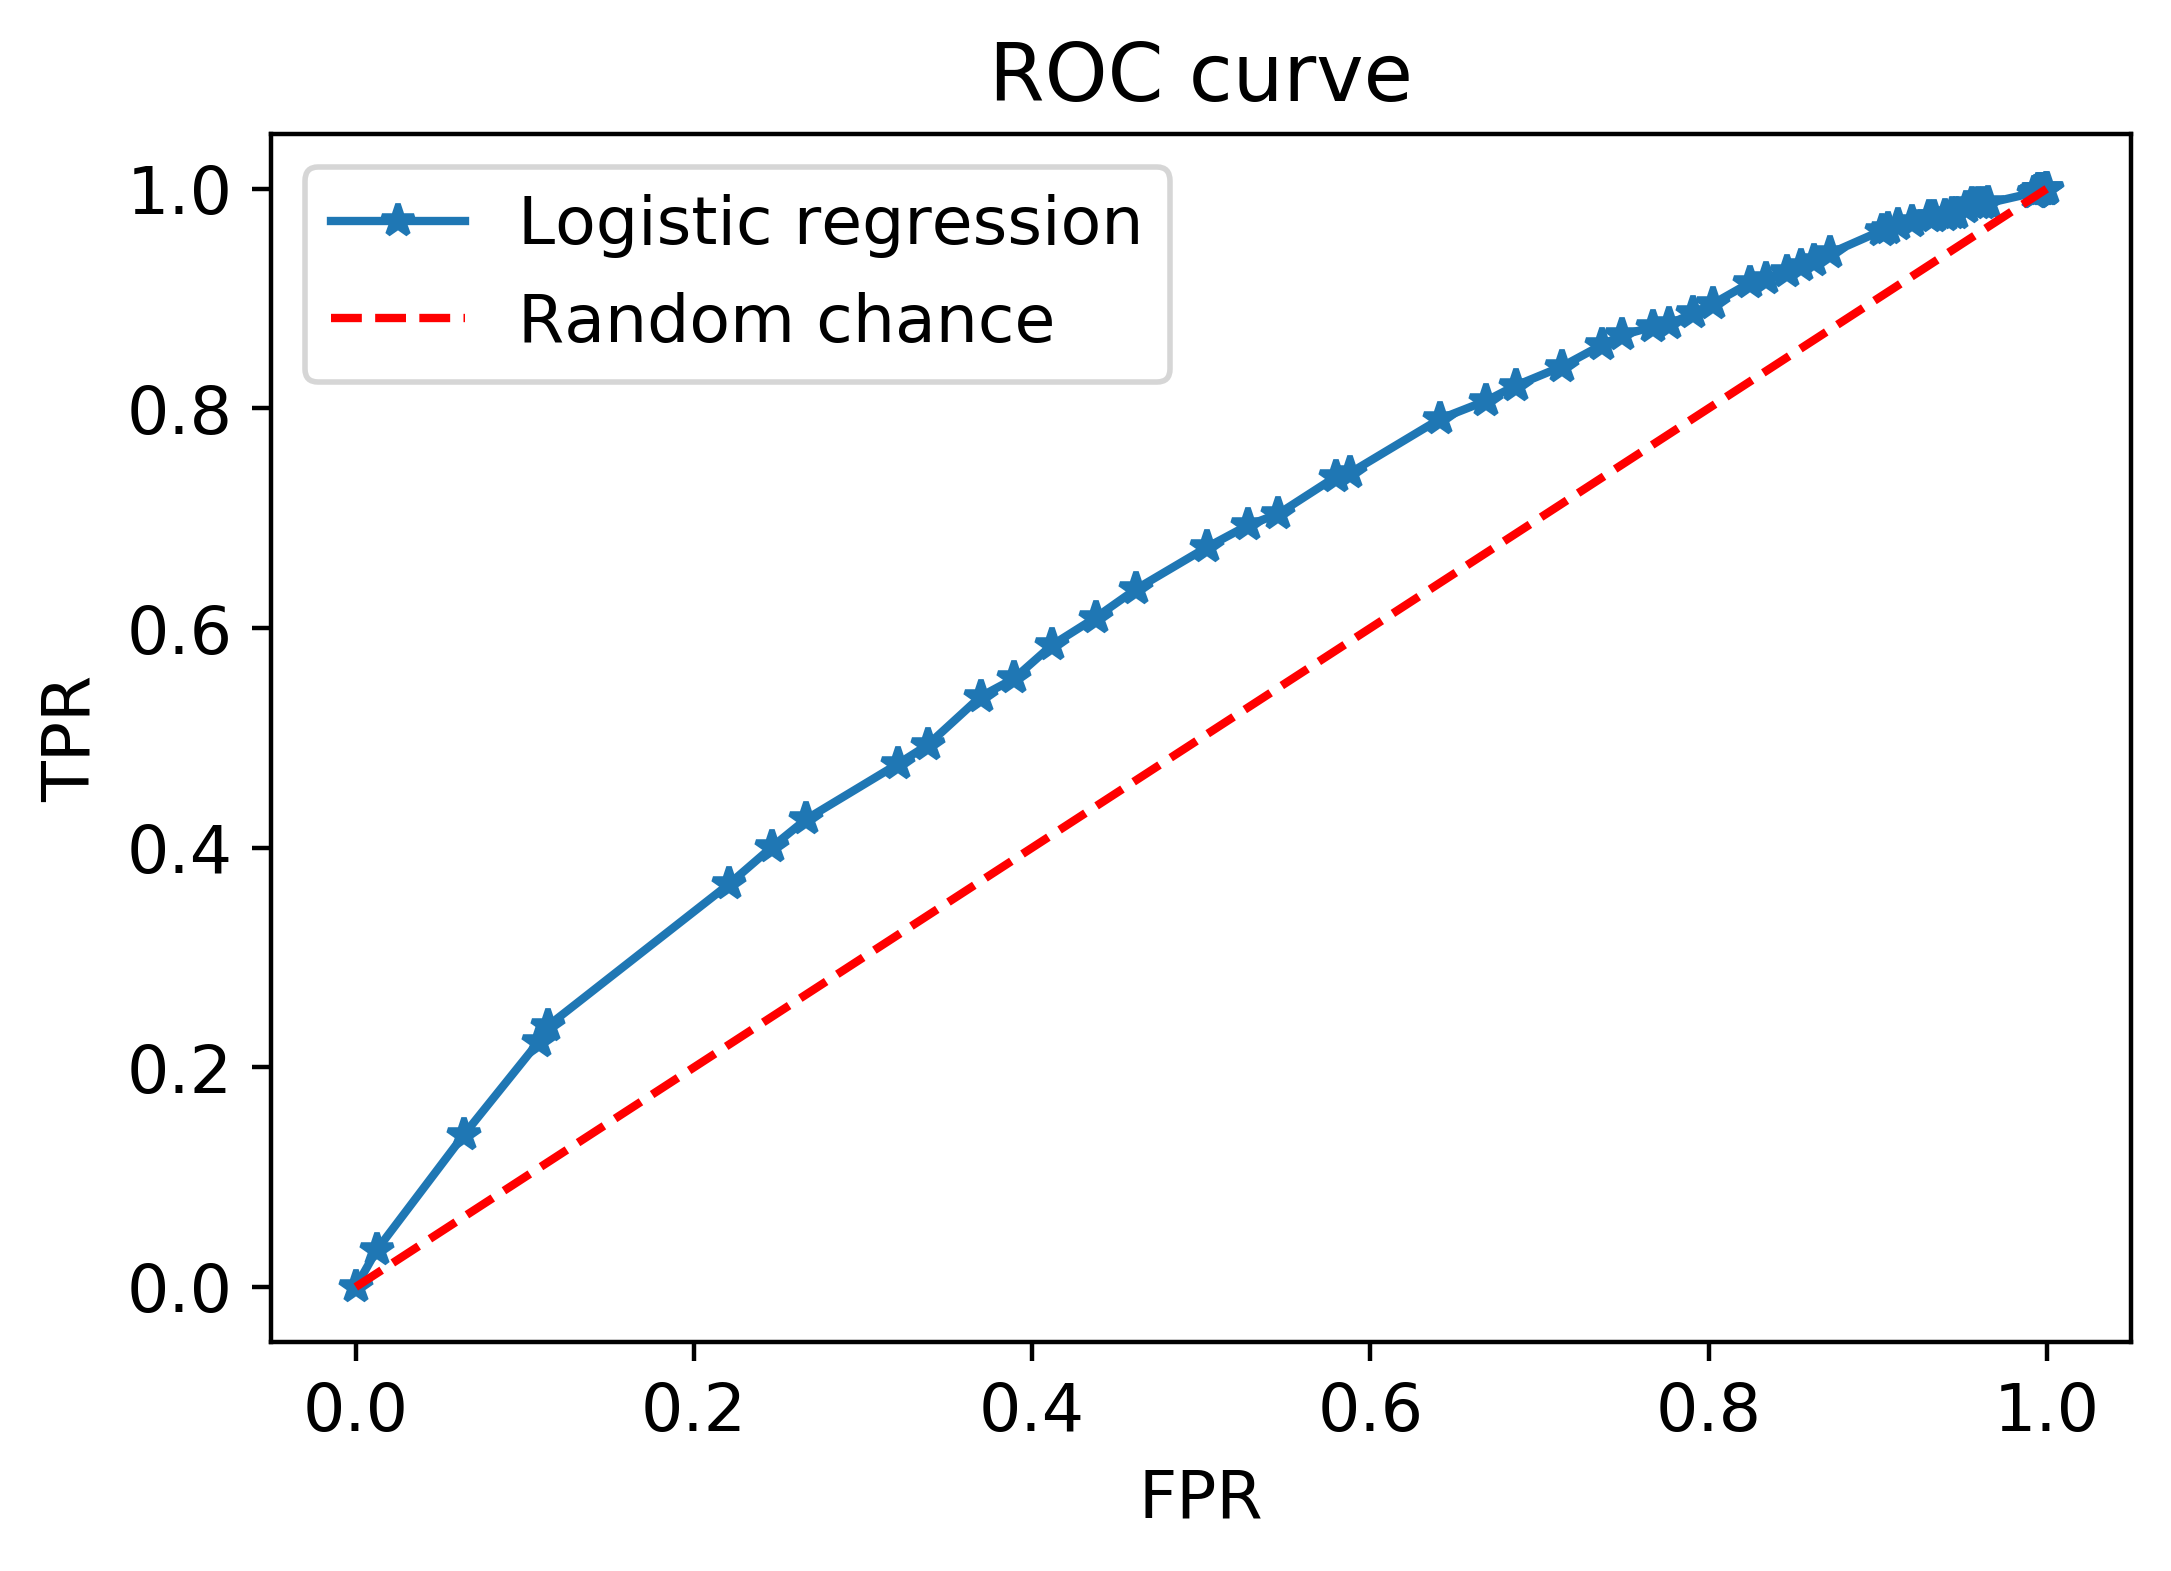

In [29]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [30]:
thresholds

array([1.48298465, 0.48298465, 0.46600867, 0.44911106, 0.4323301 ,
       0.415703  , 0.3992656 , 0.38305207, 0.3670946 , 0.35142324,
       0.33606566, 0.321047  , 0.30638978, 0.29211383, 0.27823623,
       0.26477132, 0.25173076, 0.23912359, 0.2269563 , 0.21523299,
       0.20395547, 0.19312344, 0.18273464, 0.17278502, 0.16326891,
       0.15417922, 0.14550758, 0.13724452, 0.12937966, 0.12190182,
       0.11479918, 0.10805946, 0.10166997, 0.09561779, 0.08988983,
       0.08447295, 0.07935404, 0.07452008, 0.0699582 , 0.06565578,
       0.06160044, 0.05778008, 0.05418298, 0.05079775, 0.04761337,
       0.04461922, 0.0418051 , 0.03916119, 0.03667808, 0.0343468 ,
       0.03215875, 0.03010574, 0.02817998, 0.02637405, 0.02468092,
       0.0230939 , 0.02021324, 0.01890793, 0.01654057, 0.01546869,
       0.01446524, 0.01033455, 0.00844134, 0.0078901 , 0.00644178])

In [31]:
metrics.roc_auc_score(y_test, pos_proba)

0.6201990844642832

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [32]:
p,r,th=metrics.precision_recall_curve(y_test, pos_proba)
p,r

(array([0.21661665, 0.21651032, 0.21663225, 0.21667293, 0.21671362,
        0.21687653, 0.21695807, 0.21712135, 0.21724398, 0.21728488,
        0.2173258 , 0.21715363, 0.21719457, 0.21704695, 0.21716981,
        0.21725179, 0.22033243, 0.22073643, 0.22129396, 0.22189753,
        0.22198318, 0.22200354, 0.22244133, 0.22283792, 0.22392516,
        0.22441652, 0.22553363, 0.22670997, 0.22714286, 0.22761729,
        0.22985832, 0.2305063 , 0.23116659, 0.231755  , 0.23327465,
        0.23466667, 0.23569638, 0.23654424, 0.23784926, 0.23956357,
        0.24237288, 0.24342913, 0.24518744, 0.24855794, 0.25020134,
        0.25417595, 0.25845411, 0.26031164, 0.26293661, 0.26655574,
        0.27004512, 0.27573253, 0.27804107, 0.28183716, 0.28231142,
        0.28683603, 0.28744327, 0.29115934, 0.30654206, 0.31032172,
        0.31477357, 0.36617843, 0.36338028, 0.37470726, 0.42857143,
        1.        ]),
 array([1.        , 0.9991342 , 0.9991342 , 0.9991342 , 0.9991342 ,
        0.9991342 , 0.9991

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision-Recall-Curve')

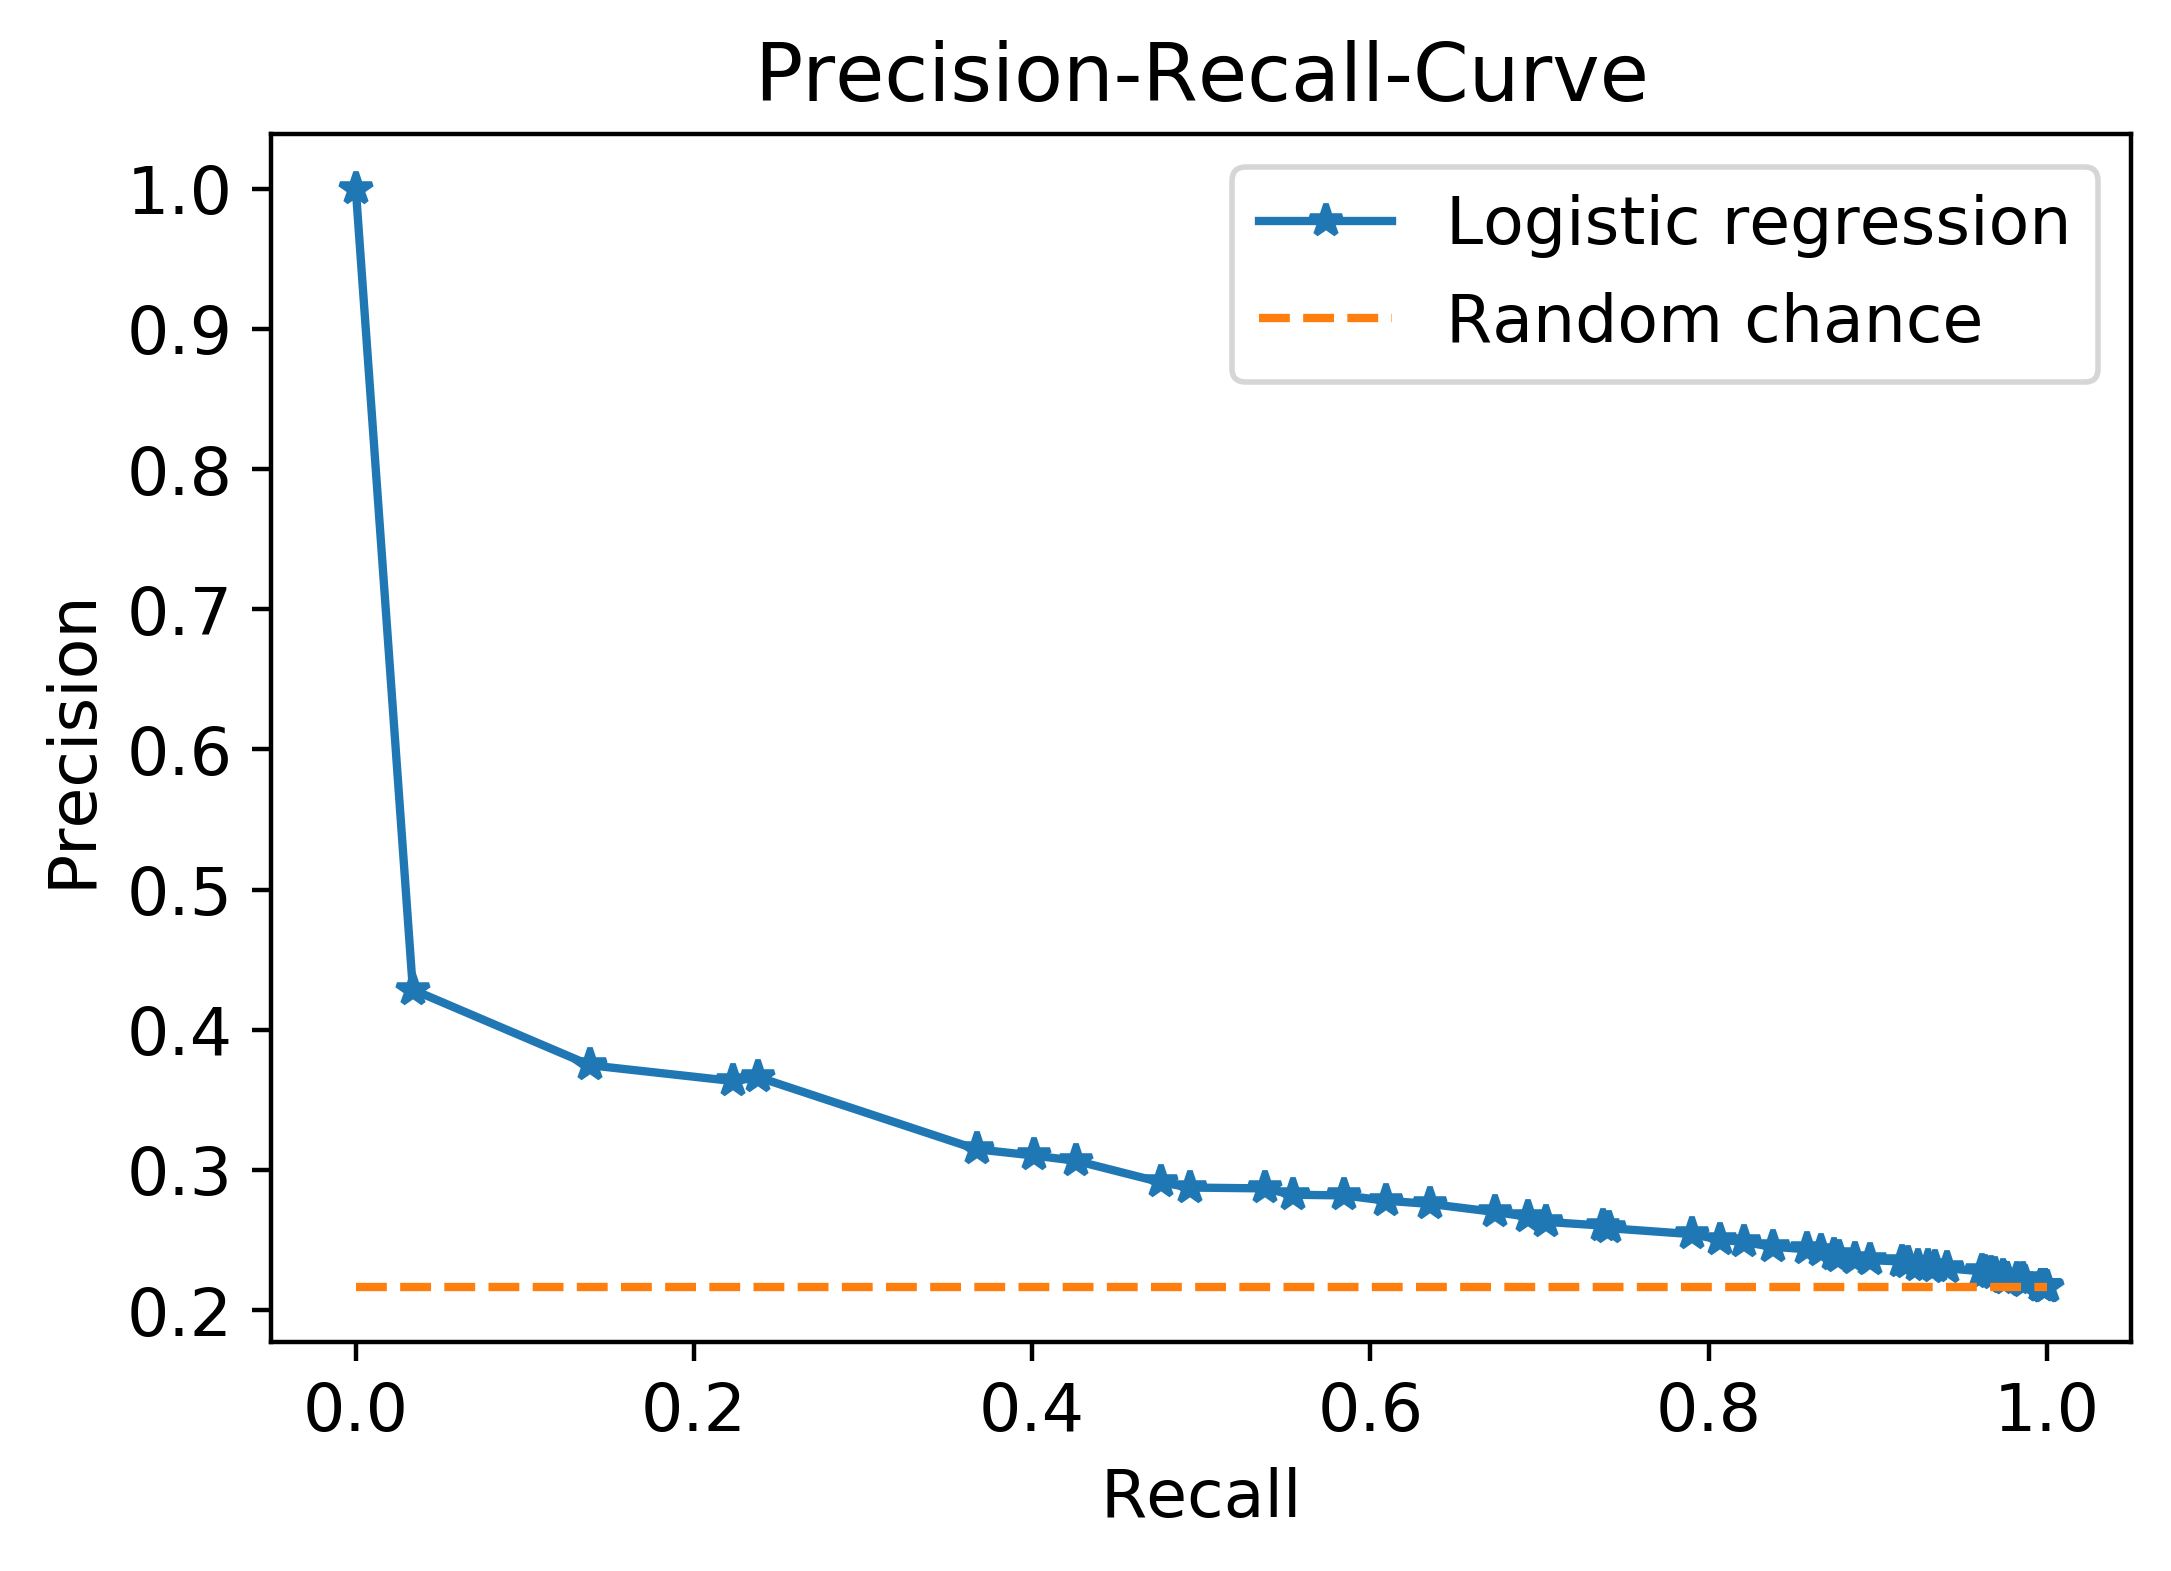

In [33]:
plt.plot(r,p, '*-')
ns= len(y_test[y_test==1]) / len(y_test)
# plt.plot([0, 1], [0, 1], 'r--')
plt.plot([0, 1], [ns, ns], linestyle='--', label='Random Chance')
plt.legend(['Logistic regression', 'Random chance'])
# plt.plot(r, p, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall-Curve')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [34]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test,pos_proba)

0.29824891448211244

In [35]:
metrics.auc(r,p)

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [36]:
y_pred_proba_train = lg_model.predict_proba(X_train)

In [37]:
pos_proba_train=y_pred_proba_train[:,1]

In [38]:
metrics.roc_auc_score(y_train, pos_proba_train)

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?


The ROC AUC for train data : 0.618 and for test data is 0.620 and they not very different.The metric ROC AUC score ranges between 0.5 to 1 and in our case the ROC AUC for both train and test data is pretty close to 0.5, meaning it's not a very effective classifier.